In [ ]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [ ]:
# loading the dataset into pandas dataframe
insurance_data = pd.read_csv('/content/insurance.csv')

In [ ]:
# printing the first five row
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# shape of the data
insurance_data.shape

(1338, 7)

In [ ]:
# checking for the missing values
insurance_data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [ ]:
# getting information about the dataset
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical columm:

Sex

Smoker

Region

**Data Analysis**

In [ ]:
# getting some statical measures about the dataset
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-162-b84a27937676>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['age'])


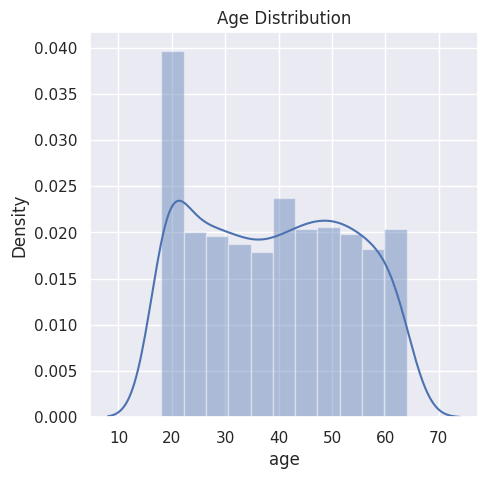

In [ ]:
# checking the disstribution of AGE value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['age'])
plt.title("Age Distribution")
plt.show()

<ipython-input-163-f5f2151eceb4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['bmi'])


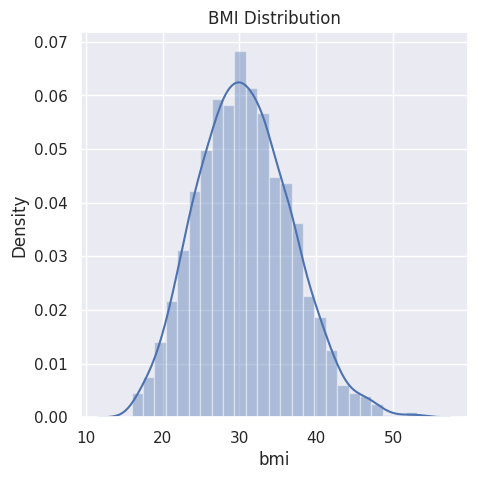

In [ ]:
# checking the distribution for BMI value
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

Normal BMI Range --> 18.5 to 24.9

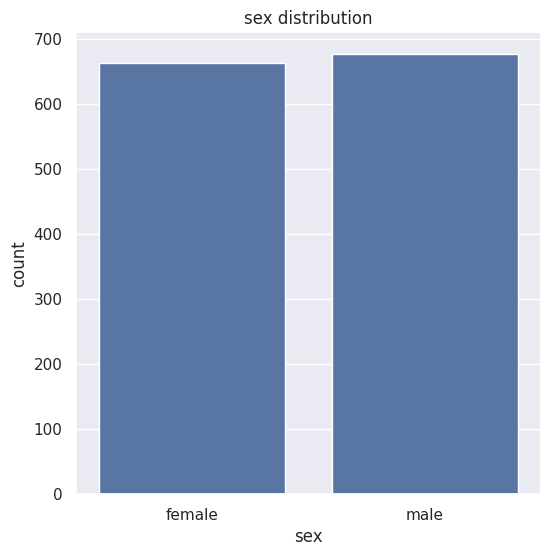

In [ ]:
# for categorical features we use countplot
# for GENDER column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data = insurance_data)
plt.title("sex distribution")
plt.show()

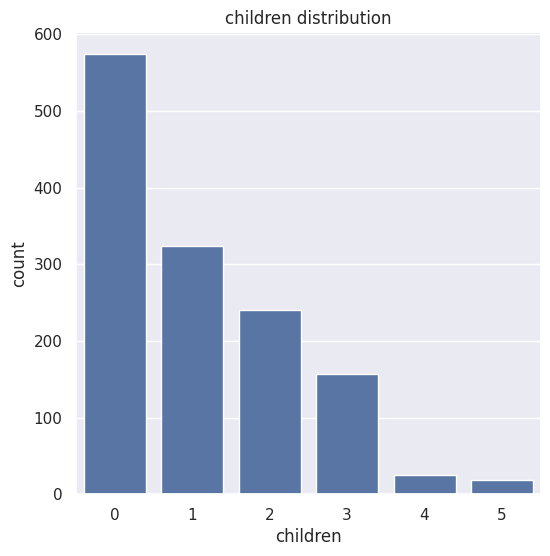

In [ ]:
# for CHILDREN
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance_data)
plt.title("children distribution")
plt.show()

In [ ]:
insurance_data['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


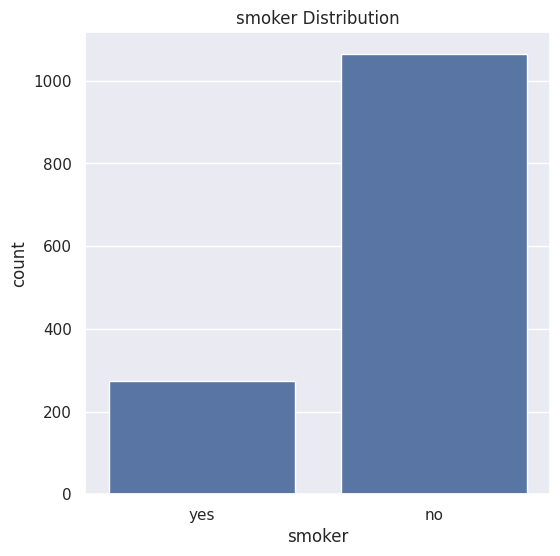

In [ ]:
# for SMOKER
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance_data)
plt.title("smoker Distribution")
plt.show()

0 ---> non smoker

1 ---> smoker

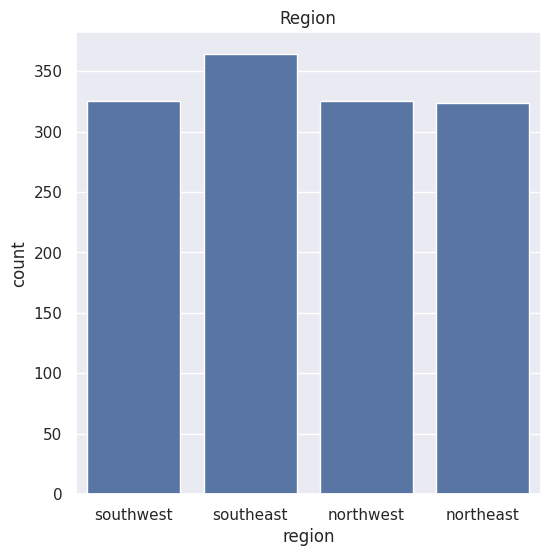

In [ ]:
#  for REGION
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_data)
plt.title("Region")
plt.show()

In [ ]:
insurance_data['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-170-d7bf381b71de>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_data['charges'])


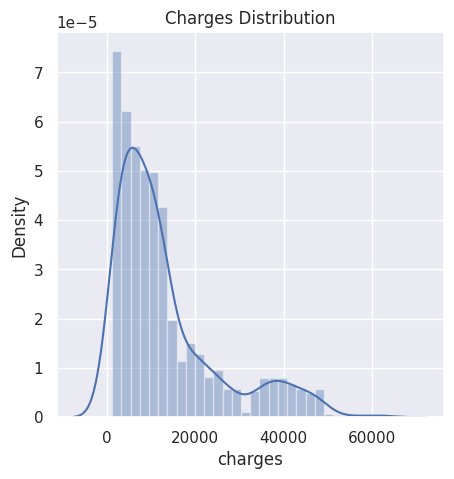

In [ ]:
# for CHARGES
plt.figure(figsize=(5,5))
sns.distplot(insurance_data['charges'])
plt.title("Charges Distribution")
plt.show()

Encoding the categorical features

In [ ]:
# in gender column we are replacing the femalw with 1 and male with 0
insurance_data['sex'] = insurance_data['sex'].map({'female':1, 'male':0})

In [ ]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_data['smoker'] = insurance_data['smoker'].map({'yes':1,'no':0})
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [ ]:
#insurance_data['region'] = insurance_data['region'].map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)
insurance_data.head()

<ipython-input-174-a1bc2795e96d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


Splitting the features and target

In [ ]:
x = insurance_data.drop(columns = 'charges',axis=1)
y = insurance_data['charges']

In [ ]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       3
4      32    0  28.880         0       0       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       3
1334   18    1  31.920         0       0       2
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       3

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


splitting data into training and testing data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


**Model Training**

In [ ]:
# loading the linear regression model
regressor = LinearRegression()

In [ ]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [ ]:
# prediction on training data
training_data_prediction = regressor.predict(x_train)

In [ ]:
# R squares valued for training data
r2_train = metrics.r2_score(y_train,training_data_prediction)
print(r2_train)

0.751505643411174


In [ ]:
# prediction on testing data
training_data_prediction = regressor.predict(x_test)

In [ ]:
# R squares valued for testing data
r2_test = metrics.r2_score(y_test,training_data_prediction)
print(r2_test)

0.7447273869684076


**Building a predictive System**

In [ ]:
input_data= (31,1,25.74,0,0,0)

# conveting the input_data to numpy array (as ip_data is a tuple)
input_data_as_np_array = np.asarray(input_data)

# reshaping the array as we are predicting for only one datapoint
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD',prediction[0])

[3760.0805765]
The insurance cost is USD 3760.080576496057


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
